In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../modules')
from FSC import FSC_DiscreteObs
import ObsModels 

In [98]:
NStepsObs = 1000
Y = 2
RateMatrixObs = np.ones((Y,Y))
RateMatrixObs = RateMatrixObs + 50*np.eye(Y)

observations = ObsModels.DiscreteMarkovChain(NStepsObs, RateMatrixObs)

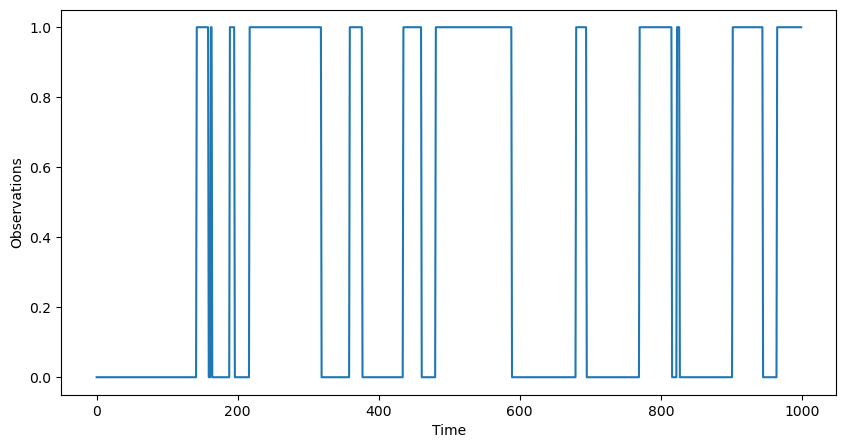

In [99]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(observations, markersize=2)
ax.set_xlabel('Time')
ax.set_ylabel('Observations')

plt.show()

In [100]:
M = 2
A = 2
#Theta = np.random.randn(Y, M, M, A)

ThetaFollowObs = np.array([[[[10, 0.01], [0.01, 0.01]],
                            [[0.01, 0.01], [0.01, 10]]],
                           [[[0.01, 0.01], [0.01, 1]],
                            [[1, 0.01], [0.01, 0.01]]]])


Psi = np.array([1, 2])

FSC = FSC_DiscreteObs(ThetaFollowObs, Psi, verbose = True)

Initializing FSC with 2 memory states, 2 actions, and 2 observations.


In [101]:
FSC.TMat[1,0]

array([[0.1757088 , 0.1757088 ],
       [0.1757088 , 0.47287359]])

In [102]:
FSC.load_observations(observations)

In [103]:
NSteps = 200
trajectory = FSC.generate_trajectory(NSteps)
Time = np.arange(NSteps)

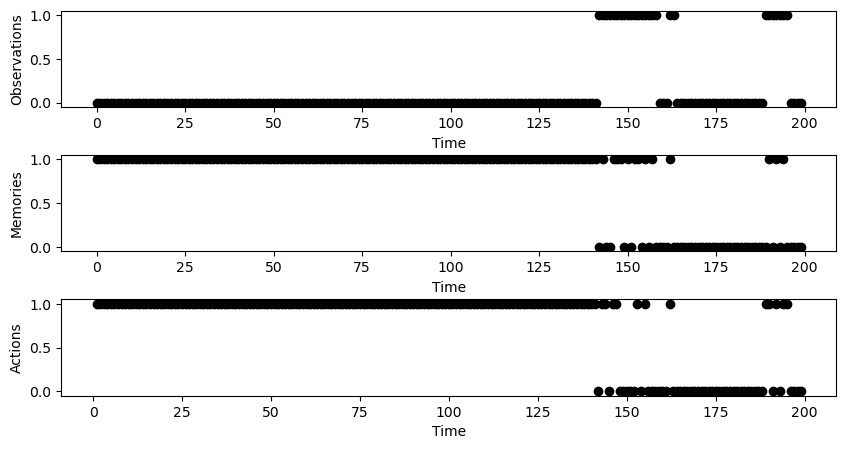

In [104]:
fig, ax = plt.subplots(3,1, figsize=(10,5))
plt.subplots_adjust(hspace=0.5)

ax[0].plot(Time, trajectory["observations"], 'o', c= 'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Observations')

ax[1].plot(Time, trajectory["memories"], 'o', c= 'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Memories')

ax[2].plot(Time[1:], trajectory["actions"][1:], 'o', c= 'k')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Actions')

plt.show()